# Analysis of Covid 19 spread in the Midwest states
Team Name: "GIT YOUR POPCORN READY!"

Team Members: Anu, Dipti, Korbin, Yalu

Datasets used:
1. https://covidtracking.com/data
2. Census data
3. https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

In [1]:
#Downloading and installing prerequisites
!pip install census
!pip install us

  Created wheel for us: filename=us-2.0.1-cp37-none-any.whl size=11858 sha256=b0c698f41f1adecd863bde1cc0ec2b38527ca31180c486cb82c711e5f5624331
  Stored in directory: C:\Users\aguha\AppData\Local\pip\Cache\wheels\06\41\3e\a009ade7e7b88199f1a5ff29fac69a4dc332a8b05d50e038a9
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp37-none-any.whl size=10384 sha256=013ebae70a69707aa27f649dff418996224c8f9e1c899fb7f29849884fad3be8
  Stored in directory: C:\Users\aguha\AppData\Local\pip\Cache\wheels\9c\6f\33\92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from time import ctime as convert
from datetime import datetime
from census import Census
import gmaps

# Census & gmaps API Keys
from config import api_key
c = Census(api_key, year=2013)


# What factors associate with COVID-19 spread? 


Some racial groups are more vulnerable

Is poverty also a factor?

Instead of focusing on just Illinois, we decided to study all 12 states in midwest to expand the project scope. 

We can analyse multiple datasets to understand this much better.


In [11]:
# Read in the csv file for Covid Data and Create dataframe
covid_df = pd.read_csv('illinois_covid_data.csv')
covid_df=covid_df.drop([ "positiveScore","negativeScore", "negativeRegularScore", "commercialScore","grade","score","pending",
                          "inIcuCurrently" ,"inIcuCumulative","hospitalizedCurrently","onVentilatorCurrently","hospitalizedCumulative",
                          "onVentilatorCumulative","posNeg","hospitalized","fips", "recovered","dateModified","dateChecked","notes","hash","lastUpdateEt","checkTimeEt","total"], axis=1)

#Create a list of the mid west states
mw_state_list = ['IL', 'ND','SD','NE','KS','MO','IA','MN','WI','MI','IN','OH']

# Slice the original dataframe using the list of mid west states
mw_covid_df= covid_df[covid_df['state'].isin(mw_state_list)]

mw_covid_df =mw_covid_df.reset_index()
mw_covid_df["Mortality Rate (per 100)"] = np.round(100*mw_covid_df["death"]/mw_covid_df["positive"],2)
mw_covid_df["Positive Rate (per 100)"] = np.round(100*mw_covid_df["positive"]/mw_covid_df["totalTestResults"],2)
mw_covid_df

,index,state,positive,negative,death,totalTestResults,Mortality Rate (per 100),Positive Rate (per 100)
0,12,IA,1899,16986,49.0,18885,2.58,10.06
1,14,IL,23247,87369,868.0,110616,3.73,21.02
2,15,IN,8527,37490,388.0,46017,4.55,18.53
3,16,KS,1426,12721,69.0,14147,4.84,10.08
4,22,MI,27001,59225,1768.0,86226,6.55,31.31
5,23,MN,1695,37546,79.0,39241,4.66,4.32
6,24,MO,4686,43292,133.0,47978,2.84,9.77
7,28,ND,341,10575,9.0,10916,2.64,3.12
8,29,NE,871,10486,18.0,11357,2.07,7.67
9,35,OH,7153,60721,324.0,67874,4.53,10.54


# Total reported cases till date in the Midwest

In [12]:
#Midwest reported cases
mw_covid_sum_df =mw_covid_df
mw_covid_sum_df.loc['total'] =mw_covid_sum_df.sum(numeric_only=True, axis =0)
total_positive =mw_covid_sum_df["positive"].sum()
total_negative =mw_covid_sum_df["negative"].sum()
total_death =mw_covid_sum_df["death"].sum()
mw_covid_sum_df

total=pd.DataFrame([[total_positive, total_negative,total_death]],columns=['Total MW Positives', 'Total MW Negatives', 'Total MW Deaths'])
total.style.background_gradient(cmap='Wistia',subset=["Total MW Positives"])\
                        .background_gradient(cmap='Reds',subset=["Total MW Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Total MW Negatives"])



,Total MW Positives,Total MW Negatives,Total MW Deaths
0,162778.000000,845432.000000,7762.000000


# Positive cases in Midwest states

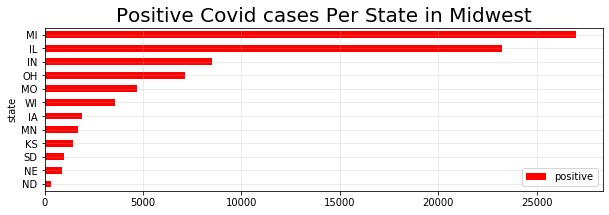

<Figure size 432x288 with 0 Axes>

In [13]:
#Plot Positives cases in Midwest
state_and_positive = mw_covid_df[["state","positive"]]
#Drop Nan values
state_and_positive=state_and_positive.dropna()
#Set the index to be "State" so they will be used as labels
state_and_positive = state_and_positive.set_index("state").sort_values('positive')

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_positive.plot(kind="barh", color="red",figsize=(10,3))

# Set a title for the chart
plt.title("Positive Covid cases Per State in Midwest",fontsize=20)
plt.grid(alpha=0.3)
plt.show()
plt.tight_layout()
plt.savefig("fig1.png")

# Negative cases in Midwest states

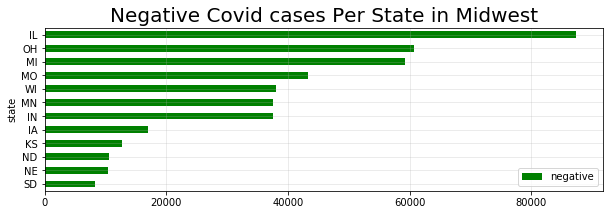

<Figure size 432x288 with 0 Axes>

In [14]:
#Plot Negatives cases in Midwest
state_and_negative = mw_covid_df[["state","negative"]]
#Drop Nan values
state_and_negative=state_and_negative.dropna()
#Set the index to be "State" so they will be used as labels
state_and_negative = state_and_negative.set_index("state").sort_values('negative')

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_negative.plot(kind="barh", color="green",figsize=(10,3))

# Set a title for the chart
plt.title("Negative Covid cases Per State in Midwest",fontsize=20)
plt.grid(alpha=0.3)
plt.show()
plt.tight_layout()
plt.savefig("fig2.png")

# Deaths due to Covid 19 in Midwest states

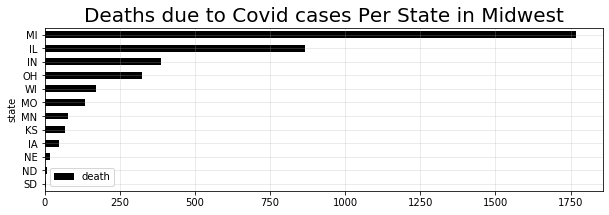

<Figure size 432x288 with 0 Axes>

In [15]:
#Plot Deaths in Midwest
state_and_death = mw_covid_df[["state","death"]]
#Drop Nan values
state_and_death=state_and_death.dropna()
#Set the index to be "State" so they will be used as labels
state_and_death = state_and_death.set_index("state").sort_values('death')

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_death.plot(kind="barh",color ="black",figsize=(10,3))

# Set a title for the chart
plt.title("Deaths due to Covid cases Per State in Midwest",fontsize=20)
plt.grid(alpha=0.3)
plt.show()
plt.tight_layout()
plt.savefig("fig3.png")

# Analysis of  Census data for Poverty count

In [16]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
#census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
#census_pd["Unemployment Rate"] = 100 * \
#    census_pd["Unemployment Count"].astype(int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count"]]
census_pd = census_pd.drop('State', 1)
census_pd.rename({'Name': 'state'}, axis=1, inplace=True)
#Create a list of the mid west states
mw2_state_list = ['Illinois', 'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri','Wisconsin','Michigan',
                  'Indiana','Ohio']

# Slice the original dataframe using the list of mid west states
census_pd= census_pd[census_pd['state'].isin(mw2_state_list)]
census_pd['state']=census_pd['state'].replace({'North Dakota':'ND','South Dakota':'SD','Nebraska':'NE','Kansas':'KS','Missouri':'MO','Iowa':'IA',
                           'Minnesota':'MN','Wisconsin':'WI','Michigan':'MI','Illinois':'IL','Indiana':'IN','Ohio':'OH'})
census_pd2 =census_pd.sort_values('Poverty Count',ascending=False)
census_pd2.style.background_gradient(cmap='Reds',subset=["Population"])\
                        .background_gradient(cmap='Blues',subset=["Median Age"])\
                        .background_gradient(cmap='Greens',subset=["Household Income"])\
                        .background_gradient(cmap='Oranges',subset=["Per Capita Income"])\
                        .background_gradient(cmap='YlOrBr',subset=["Poverty Count"])


,state,Population,Median Age,Household Income,Per Capita Income,Poverty Count
35,OH,11549590.000000,39.000000,48308.000000,26046.000000,1773853.000000
13,IL,12848554.000000,36.800000,56797.000000,29666.000000,1772333.000000
22,MI,9886095.000000,39.100000,48411.000000,25681.000000,1625982.000000
14,IN,6514861.000000,37.100000,48248.000000,24635.000000,969881.000000
25,MO,6007182.000000,38.000000,47380.000000,25649.000000,900929.000000
49,WI,5706871.000000,38.700000,52413.000000,27523.000000,723730.000000
23,MN,5347740.000000,37.600000,59836.000000,30913.000000,598391.000000
16,KS,2868107.000000,36.000000,51332.000000,26929.000000,382820.000000
15,IA,3062553.000000,38.100000,51843.000000,27027.000000,367414.000000
27,NE,1841625.000000,36.300000,51672.000000,26899.000000,228789.000000


# Merge data sets to analyse Covid information and Census data

In [17]:
# Merge the datasets using the sate columns
census_data = pd.merge(mw_covid_df,census_pd, how="left", on="state")

census_data=census_data.dropna()
census_data =census_data.drop('index', 1)
census_data

,state,positive,negative,death,totalTestResults,Mortality Rate (per 100),Positive Rate (per 100),Population,Median Age,Household Income,Per Capita Income,Poverty Count
0,IA,1899.0,16986.0,49.0,18885.0,2.58,10.06,3062553.0,38.1,51843.0,27027.0,367414.0
1,IL,23247.0,87369.0,868.0,110616.0,3.73,21.02,12848554.0,36.8,56797.0,29666.0,1772333.0
2,IN,8527.0,37490.0,388.0,46017.0,4.55,18.53,6514861.0,37.1,48248.0,24635.0,969881.0
3,KS,1426.0,12721.0,69.0,14147.0,4.84,10.08,2868107.0,36.0,51332.0,26929.0,382820.0
4,MI,27001.0,59225.0,1768.0,86226.0,6.55,31.31,9886095.0,39.1,48411.0,25681.0,1625982.0
5,MN,1695.0,37546.0,79.0,39241.0,4.66,4.32,5347740.0,37.6,59836.0,30913.0,598391.0
6,MO,4686.0,43292.0,133.0,47978.0,2.84,9.77,6007182.0,38.0,47380.0,25649.0,900929.0
7,ND,341.0,10575.0,9.0,10916.0,2.64,3.12,689781.0,36.4,53741.0,29732.0,79433.0
8,NE,871.0,10486.0,18.0,11357.0,2.07,7.67,1841625.0,36.3,51672.0,26899.0,228789.0
9,OH,7153.0,60721.0,324.0,67874.0,4.53,10.54,11549590.0,39.0,48308.0,26046.0,1773853.0


# Analysis of the Death Rate and Poverty count via Graphs
Comparing the Death rate vs Poverty count in Midwest, we can look at the correlation and see that it is moderately strong. Mortality rate was higher in most areas of higher poverty

The line equation is y = 0.0x + 2.45
R squared: 0.37739653456156547
P value:0.033559695834120856
The correlation coefficient between Poverty count and Mortality Rate is 0.61


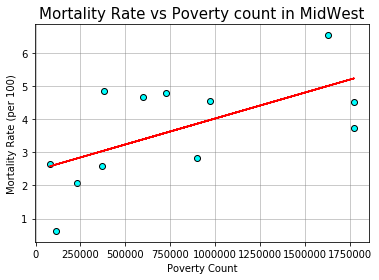

<Figure size 432x288 with 0 Axes>

In [18]:
#Plot Death rate vs poverty count in Midwest

## Convert to floats and store Mortality Rate and Poverty Count as x and y values
y_values = census_data['Mortality Rate (per 100)'].astype('float')
x_values = census_data['Poverty Count'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line equation is {line_eq}")

# Plot scatter plot
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,marker = "o", facecolor = "cyan", edgecolor="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(3,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Mortality Rate (per 100)')
plt.xlabel('Poverty Count')
plt.title("Mortality Rate vs Poverty count in MidWest",fontsize=15)
# Print r square value
print(f"R squared: {rvalue**2}")
print(f"P value:{pvalue}")

# Calculate the correlation coefficient between Poverty count and Mortality Rate
print(f"The correlation coefficient between Poverty count and Mortality Rate is {round(st.pearsonr(x_values,y_values)[0],2)}")

# Show plot
plt.show()
plt.savefig("fig4.png")

# Analysis of the Positive Rate and poverty count via Graphs
#Comparing the Positive rate vs Poverty count in Midwest, we can look at the correlation and see that it is quite strong. 

The line equation is y = 0.0x + 5.28
R squared: 0.47422009957530353
P value:0.013270308499938016
The correlation coefficient between Poverty count and Positive Rate is 0.69


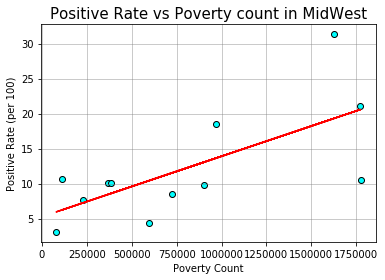

<Figure size 432x288 with 0 Axes>

In [19]:
#Plot Positive rate vs poverty count in Midwest

## Convert to floats and store Mortality Rate and Poverty Count as x and y values
y_values = census_data['Positive Rate (per 100)'].astype('float')
x_values = census_data['Poverty Count'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line equation is {line_eq}")

# Plot scatter plot
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,marker = "o", facecolor = "cyan", edgecolor="black")
 

#plt.scatter(x_values, weather_df["Max Temp"], marker = "o", facecolor = "cyan", edgecolor="black")
# Plot regression line
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(13,80000),fontsize=15,color="red")

# Label plot
plt.ylabel('Positive Rate (per 100)')
plt.xlabel('Poverty Count')
plt.title("Positive Rate vs Poverty count in MidWest",fontsize=15)
# Print r square value
print(f"R squared: {rvalue**2}")
print(f"P value:{pvalue}")

# Calculate the correlation coefficient between Poverty count and Positive Rate
print(f"The correlation coefficient between Poverty count and Positive Rate is {round(st.pearsonr(x_values,y_values)[0],2)}")


# Show plot
plt.show()
plt.savefig("fig5.png")

# Analysis of the Positive Rate and Household Income via Graphs
Here we have negative correlation.We can say that in lower income households the positive rate seems higher, but not statistically significant.

The line equation is y = -0.0x + 47.13
R squared: 0.10428969632696994
P value:0.30590901758439987
The correlation coefficient between Household Income and Positive Rate is -0.32


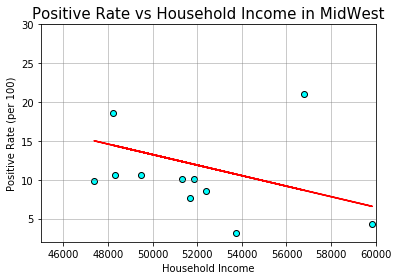

<Figure size 432x288 with 0 Axes>

In [20]:
#Plot Positive rate vs poverty count in Midwest

## Convert to floats and store Mortality Rate and Poverty Count as x and y values

x_values = census_data['Household Income'].astype('float')
y_values = census_data['Positive Rate (per 100)'].astype('float')



# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line equation is {line_eq}")
# Plot scatter plot
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,marker = "o", facecolor = "cyan", edgecolor="black")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(25,40000),fontsize=11,color="red")

plt.xlim([45000, 60000])
plt.ylim([2,30])
figsize=(6,3)
# Label plot
plt.ylabel('Positive Rate (per 100)')
plt.xlabel('Household Income')
plt.title("Positive Rate vs Household Income in MidWest",fontsize=15)
# Print r square value
print(f"R squared: {rvalue**2}")
print(f"P value:{pvalue}")

# Calculate the correlation coefficient between Household Income and Positive Rate
print(f"The correlation coefficient between Household Income and Positive Rate is {round(st.pearsonr(x_values,y_values)[0],2)}")

# Show plot
plt.show()
plt.savefig("fig6.png")

# Analysis of Spread and Death due to COVID 19 in the Midwest
The number of deaths in the midwest went up in the first 2 weeks of April but after that the trend has been the same.
The total number of recovered cases is far less than the positive cases.

In [21]:
# Read in the csv file for Covid Data and Create dataframe
covid_timeline_df = pd.read_csv('daily (1).csv')
covid_timeline_df=covid_timeline_df.drop([ "pending","hospitalizedCurrently","hospitalizedCumulative","inIcuCurrently",
                                         "inIcuCumulative","onVentilatorCurrently","onVentilatorCumulative","hash",
                                        "hospitalized","total" ,"posNeg","fips","dateChecked"], axis=1)

,""#Create a list of the mid west states
mw_state_list = ['IL', 'ND','SD','NE','KS','MO','IA','MN','WI','MI','IN','OH']

# Slice the original dataframe using the list of mid west states
mw_covid_timeline_df= covid_timeline_df[covid_timeline_df['state'].isin(mw_state_list)]
mw_covid_timeline_df.date =mw_covid_timeline_df.date.astype(str)
mw_covid_timeline_df['date'] =pd.to_datetime(mw_covid_timeline_df['date'])
mw_covid_timeline_df=mw_covid_timeline_df.dropna()
mw_covid_timeline_df

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,date,state,positive,negative,recovered,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
14,2020-04-20,IA,3159.0,22661.0,1235.0,79.0,25820.0,4.0,0.0,1013.0,257.0,1270.0
24,2020-04-20,MI,32000.0,81798.0,3237.0,2468.0,113798.0,77.0,0.0,3561.0,576.0,4137.0
25,2020-04-20,MN,2470.0,44380.0,1202.0,143.0,46850.0,9.0,28.0,1020.0,114.0,1134.0
31,2020-04-20,ND,627.0,14120.0,189.0,13.0,14747.0,3.0,2.0,1075.0,42.0,1117.0
45,2020-04-20,SD,1685.0,10641.0,709.0,7.0,12326.0,0.0,13.0,214.0,50.0,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1375,2020-03-27,ND,65.0,2427.0,15.0,0.0,2492.0,0.0,3.0,388.0,13.0,401.0
1389,2020-03-27,SD,58.0,2387.0,21.0,1.0,2445.0,0.0,0.0,414.0,12.0,426.0
1414,2020-03-26,IA,179.0,2578.0,15.0,1.0,2757.0,0.0,10.0,0.0,34.0,34.0
1445,2020-03-26,SD,46.0,1973.0,16.0,1.0,2019.0,0.0,0.0,1154.0,5.0,1159.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


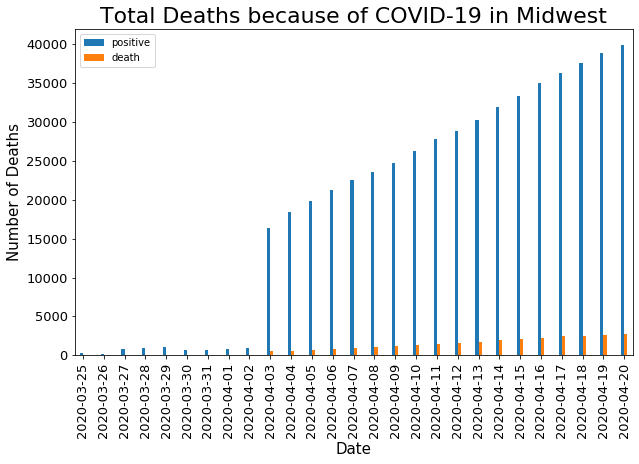

<Figure size 432x288 with 0 Axes>

In [22]:
df = mw_covid_timeline_df.groupby(['date'])['positive','death'].sum()

ax = df.plot(kind='bar', figsize=(10,6),  fontsize=13,width=0.3);
x_labels = df.index.strftime('%Y-%m-%d')
ax.set_xticklabels(x_labels)
ax.set_alpha(0.8)
ax.set_title("Total Deaths because of COVID-19 in Midwest", fontsize=22)
ax.set_xlabel("Date", fontsize=15);
ax.set_ylabel("Number of Deaths", fontsize=15);
plt.show()
plt.savefig("fig7.png")


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


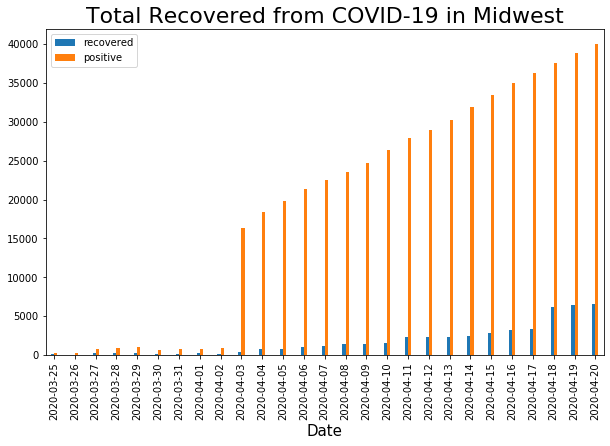

<Figure size 432x288 with 0 Axes>

In [23]:
df2 = mw_covid_timeline_df.groupby(['date'])['recovered','positive'].sum()

ax = df2.plot(kind='bar', figsize=(10,6),width=0.3);
x_labels = df.index.strftime('%Y-%m-%d')
ax.set_xticklabels(x_labels)
ax.set_alpha(0.8)
ax.set_title("Total Recovered from COVID-19 in Midwest", fontsize=22)
ax.set_xlabel("Date", fontsize=15);

plt.show()
plt.savefig("fig8.png")

# Census poverty data from counties in midwest. 

Since the sample size at states level is comparatively small, we decided to study the data at county level to get more correct information. 

In [24]:
# Request census data through API
census_county_data = c.acs5.state_county(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), Census.ALL, Census.ALL)
census_county_df = pd.DataFrame(census_county_data)
census_county_df.head()

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,state,county
0,"Las Marías Municipio, Puerto Rico",15779.0,9699.0,37.3,7000.0,5563.0,72,083
1,"Añasco Municipio, Puerto Rico",16568.0,29086.0,39.4,7892.0,14599.0,72,011
2,"San Sebastián Municipio, Puerto Rico",14463.0,41798.0,39.7,7174.0,22961.0,72,131
3,"Bayamón Municipio, Puerto Rico",24374.0,204725.0,38.6,12648.0,70734.0,72,021
4,"Cataño Municipio, Puerto Rico",18977.0,27669.0,35.6,10567.0,13563.0,72,033


In [25]:
#Clean up the data
census_county_df = census_county_df.drop([ "state","county"],axis=1)
census_county_df.head()

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E
0,"Las Marías Municipio, Puerto Rico",15779.0,9699.0,37.3,7000.0,5563.0
1,"Añasco Municipio, Puerto Rico",16568.0,29086.0,39.4,7892.0,14599.0
2,"San Sebastián Municipio, Puerto Rico",14463.0,41798.0,39.7,7174.0,22961.0
3,"Bayamón Municipio, Puerto Rico",24374.0,204725.0,38.6,12648.0,70734.0
4,"Cataño Municipio, Puerto Rico",18977.0,27669.0,35.6,10567.0,13563.0


In [26]:
census_county_df[['county','state']] = census_county_df['NAME'].str.split(", ", expand=True)
census_county_df.head()

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,county,state
0,"Las Marías Municipio, Puerto Rico",15779.0,9699.0,37.3,7000.0,5563.0,Las Marías Municipio,Puerto Rico
1,"Añasco Municipio, Puerto Rico",16568.0,29086.0,39.4,7892.0,14599.0,Añasco Municipio,Puerto Rico
2,"San Sebastián Municipio, Puerto Rico",14463.0,41798.0,39.7,7174.0,22961.0,San Sebastián Municipio,Puerto Rico
3,"Bayamón Municipio, Puerto Rico",24374.0,204725.0,38.6,12648.0,70734.0,Bayamón Municipio,Puerto Rico
4,"Cataño Municipio, Puerto Rico",18977.0,27669.0,35.6,10567.0,13563.0,Cataño Municipio,Puerto Rico


In [27]:
census_county_df['county'] = census_county_df['county'].str.replace(" County", "")
census_county_df

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,county,state
0,"Las Marías Municipio, Puerto Rico",15779.0,9699.0,37.3,7000.0,5563.0,Las Marías Municipio,Puerto Rico
1,"Añasco Municipio, Puerto Rico",16568.0,29086.0,39.4,7892.0,14599.0,Añasco Municipio,Puerto Rico
2,"San Sebastián Municipio, Puerto Rico",14463.0,41798.0,39.7,7174.0,22961.0,San Sebastián Municipio,Puerto Rico
3,"Bayamón Municipio, Puerto Rico",24374.0,204725.0,38.6,12648.0,70734.0,Bayamón Municipio,Puerto Rico
4,"Cataño Municipio, Puerto Rico",18977.0,27669.0,35.6,10567.0,13563.0,Cataño Municipio,Puerto Rico
...,...,...,...,...,...,...,...,...
3216,"Monroe County, West Virginia",41234.0,13512.0,45.8,20294.0,1824.0,Monroe,West Virginia
3217,"Morgan County, West Virginia",36046.0,17502.0,45.5,22312.0,2651.0,Morgan,West Virginia
3218,"Nicholas County, West Virginia",40064.0,26168.0,44.1,23209.0,4957.0,Nicholas,West Virginia
3219,"Ohio County, West Virginia",41025.0,44156.0,43.3,26135.0,6453.0,Ohio,West Virginia


In [28]:
census_county_df = census_county_df.drop(["NAME"],axis=1)
census_county_df.head()

,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,county,state
0,15779.0,9699.0,37.3,7000.0,5563.0,Las Marías Municipio,Puerto Rico
1,16568.0,29086.0,39.4,7892.0,14599.0,Añasco Municipio,Puerto Rico
2,14463.0,41798.0,39.7,7174.0,22961.0,San Sebastián Municipio,Puerto Rico
3,24374.0,204725.0,38.6,12648.0,70734.0,Bayamón Municipio,Puerto Rico
4,18977.0,27669.0,35.6,10567.0,13563.0,Cataño Municipio,Puerto Rico


In [29]:
census_county_df = census_county_df[['state','county','B19013_001E','B01003_001E','B01002_001E','B19301_001E','B17001_002E']]
census_county_df.head()

,state,county,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E
0,Puerto Rico,Las Marías Municipio,15779.0,9699.0,37.3,7000.0,5563.0
1,Puerto Rico,Añasco Municipio,16568.0,29086.0,39.4,7892.0,14599.0
2,Puerto Rico,San Sebastián Municipio,14463.0,41798.0,39.7,7174.0,22961.0
3,Puerto Rico,Bayamón Municipio,24374.0,204725.0,38.6,12648.0,70734.0
4,Puerto Rico,Cataño Municipio,18977.0,27669.0,35.6,10567.0,13563.0


In [30]:
census_county_df = census_county_df.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count"})
census_county_df.head()


,state,county,Household Income,Population,Median Age,Per Capita Income,Poverty Count
0,Puerto Rico,Las Marías Municipio,15779.0,9699.0,37.3,7000.0,5563.0
1,Puerto Rico,Añasco Municipio,16568.0,29086.0,39.4,7892.0,14599.0
2,Puerto Rico,San Sebastián Municipio,14463.0,41798.0,39.7,7174.0,22961.0
3,Puerto Rico,Bayamón Municipio,24374.0,204725.0,38.6,12648.0,70734.0
4,Puerto Rico,Cataño Municipio,18977.0,27669.0,35.6,10567.0,13563.0


# COVID-19 Data at County Level

In [31]:
#Import covid data
covid_county_df = pd.read_csv('us-counties.csv')
covid_county_df.head()

,date,county,state,fips,cases,deaths
0,1/21/20,Snohomish,Washington,53061.0,1,0
1,1/22/20,Snohomish,Washington,53061.0,1,0
2,1/23/20,Snohomish,Washington,53061.0,1,0
3,1/24/20,Cook,Illinois,17031.0,1,0
4,1/24/20,Snohomish,Washington,53061.0,1,0


In [32]:
most_recent_covid_df = covid_county_df.loc[covid_county_df["date"]=="4/13/20"]
most_recent_covid_df.head()

,date,county,state,fips,cases,deaths
53848,4/13/20,Autauga,Alabama,1001.0,19,1
53849,4/13/20,Baldwin,Alabama,1003.0,78,1
53850,4/13/20,Barbour,Alabama,1005.0,10,0
53851,4/13/20,Bibb,Alabama,1007.0,17,0
53852,4/13/20,Blount,Alabama,1009.0,15,0


From here, we only look at data as of Apr 13 2020.

In [33]:
most_recent_covid_df = most_recent_covid_df.drop(["date"],axis=1)
most_recent_covid_df.head()

,county,state,fips,cases,deaths
53848,Autauga,Alabama,1001.0,19,1
53849,Baldwin,Alabama,1003.0,78,1
53850,Barbour,Alabama,1005.0,10,0
53851,Bibb,Alabama,1007.0,17,0
53852,Blount,Alabama,1009.0,15,0


In [34]:
#Create a list of the mid west states
mw_state_list = ["Illinois", 'Indiana','Iowa','Kansas','Michigan','Minnesota','Missouri','Nebraska','North Dakota','Ohio','South Dakota','Wisconsin']
mw_state_list

['Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'Ohio',
 'South Dakota',
 'Wisconsin']

In [35]:
# Select midwest states covid data
mw_covid_county_df = most_recent_covid_df[most_recent_covid_df['state'].isin(mw_state_list)]
mw_covid_county_df = mw_covid_county_df[['state','county','fips','cases','deaths']]
mw_covid_county_df.head()

,state,county,fips,cases,deaths
54402,Illinois,Adams,17001.0,26,0
54403,Illinois,Bond,17005.0,4,0
54404,Illinois,Boone,17007.0,13,1
54405,Illinois,Bureau,17011.0,6,0
54406,Illinois,Calhoun,17013.0,1,0


In [36]:
# Select midwest states census data
mw_census_county_df= census_county_df[census_county_df['state'].isin(mw_state_list)]
mw_census_county_df.head()

,state,county,Household Income,Population,Median Age,Per Capita Income,Poverty Count
622,Michigan,Alcona,37189.0,10785.0,55.8,22719.0,1612.0
623,Michigan,Alger,37586.0,9497.0,48.1,19717.0,1257.0
624,Michigan,Allegan,52061.0,111742.0,39.6,24140.0,14933.0
625,Michigan,Alpena,38016.0,29399.0,46.4,21948.0,4999.0
626,Michigan,Antrim,45362.0,23504.0,48.3,24370.0,3570.0


In [37]:
# Merge covid and census data
mw_census_covid_df = mw_covid_county_df.merge(mw_census_county_df, how='inner', left_on=["state","county"], right_on=["state","county"] )
mw_census_covid_df.head()

,state,county,fips,cases,deaths,Household Income,Population,Median Age,Per Capita Income,Poverty Count
0,Illinois,Adams,17001.0,26,0,45073.0,67152.0,40.6,24217.0,9374.0
1,Illinois,Bond,17005.0,4,0,48163.0,17665.0,40.0,23195.0,2462.0
2,Illinois,Boone,17007.0,13,1,60893.0,54068.0,37.3,25888.0,6055.0
3,Illinois,Bureau,17011.0,6,0,48977.0,34594.0,43.0,26705.0,3955.0
4,Illinois,Calhoun,17013.0,1,0,50436.0,5062.0,45.1,26924.0,593.0


In [38]:
# Calculate poverty rate, positive covid rate, mortality rate for each county in midwest. 
mw_census_covid_df["Poverty Rate"] = mw_census_covid_df["Poverty Count"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Positive Rate"] = mw_census_covid_df["cases"].astype(int)/mw_census_covid_df["Population"].astype(int)
mw_census_covid_df["Mortality Rate"] = mw_census_covid_df["deaths"].astype(int)/mw_census_covid_df["cases"].astype(int)

mw_census_covid_df.head()

,state,county,fips,cases,deaths,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Poverty Rate,Positive Rate,Mortality Rate
0,Illinois,Adams,17001.0,26,0,45073.0,67152.0,40.6,24217.0,9374.0,0.139594,0.000387,0.000000
1,Illinois,Bond,17005.0,4,0,48163.0,17665.0,40.0,23195.0,2462.0,0.139372,0.000226,0.000000
2,Illinois,Boone,17007.0,13,1,60893.0,54068.0,37.3,25888.0,6055.0,0.111989,0.000240,0.076923
3,Illinois,Bureau,17011.0,6,0,48977.0,34594.0,43.0,26705.0,3955.0,0.114326,0.000173,0.000000
4,Illinois,Calhoun,17013.0,1,0,50436.0,5062.0,45.1,26924.0,593.0,0.117147,0.000198,0.000000


# Graph average poverty rate


In [47]:
# Calculate the average poverty rate by state
mw_state_poverty_df = mw_census_covid_df.groupby('state')  
mw_state_poverty_df = pd.DataFrame(mw_state_poverty_df['Poverty Rate'].mean().sort_values(ascending=False))
mw_state_poverty_df

,Poverty Rate
state,
Missouri,0.167134
Michigan,0.164307
Ohio,0.148215
South Dakota,0.136659
Indiana,0.136391
Kansas,0.132744
Illinois,0.129577
North Dakota,0.125061
Wisconsin,0.122486


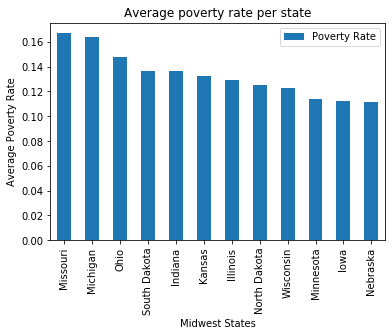

In [50]:
# Bar plot to show average poverty rate per state
state_poverty_bar_chart = mw_state_poverty_df.plot(kind='bar', title="Average poverty rate per state")
state_poverty_bar_chart.set_xlabel("Midwest States")
state_poverty_bar_chart.set_ylabel("Average Poverty Rate")
plt.savefig('Average poverty rate per state in midwest.png')
plt.show()

# Poverty rate distribution in midwest

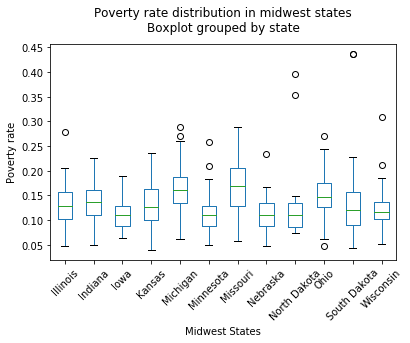

In [44]:
# Box plot to show the distribution of poverty rate in each state
mw_county_poverty_dist = mw_census_covid_df.boxplot(column=['Poverty Rate'], by='state',grid=False, rot=45, fontsize=10)
plt.title("Poverty rate distribution in midwest states", y=1.1)
plt.xlabel("Midwest States")
plt.ylabel("Poverty rate")

plt.savefig('Poverty rate distribution in midwest states.png')
plt.show()

In [48]:
# Calculate the positive covid case by state
mw_state_covid_df = mw_census_covid_df.groupby('state')  
mw_state_positive_df = pd.DataFrame(mw_state_covid_df['cases'].sum().sort_values(ascending=False))
mw_state_positive_df

,cases
state,
Michigan,25021
Illinois,21963
Indiana,8236
Ohio,6975
Missouri,4059
Wisconsin,3428
Iowa,1710
Minnesota,1616
Kansas,1385


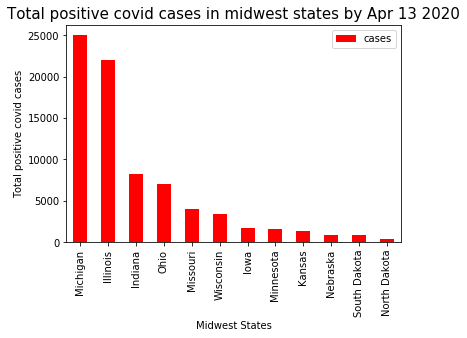

In [57]:
# Bar plot to show positive covid cases per state
state_positive_bar_chart = mw_state_positive_df.plot(kind='bar', color="red", title="Total positive covid cases in midwest states by Apr 13 2020")
state_positive_bar_chart.set_title("Total positive covid cases in midwest states by Apr 13 2020",fontsize=15)
state_positive_bar_chart.set_xlabel("Midwest States")
state_positive_bar_chart.set_ylabel("Total positive covid cases")
plt.savefig('Total positive covid cases in midwest states by Apr 13 2020.png')
plt.show()

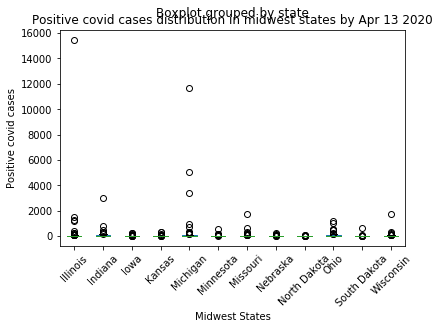

In [37]:
# Box plot to show the distribution of positive covid case in each state
mw_county_covid_dist = mw_census_covid_df.boxplot(column=['cases'], by='state',grid=False, rot=45, fontsize=10)
plt.title("Positive covid cases distribution in midwest states by Apr 13 2020")
plt.xlabel("Midwest States")
plt.ylabel("Positive covid cases")

plt.savefig('Positive covid cases distribution in midwest states by Apr 13 2020.png')
plt.show()

In [38]:
# Calculate the total covid death by state
mw_state_covid_df = mw_census_covid_df.groupby('state')  
mw_state_mortality_df = pd.DataFrame(mw_state_covid_df['deaths'].sum())
mw_state_mortality_df

,deaths
state,
Illinois,800
Indiana,350
Iowa,44
Kansas,63
Michigan,1591
Minnesota,70
Missouri,129
Nebraska,19
North Dakota,9


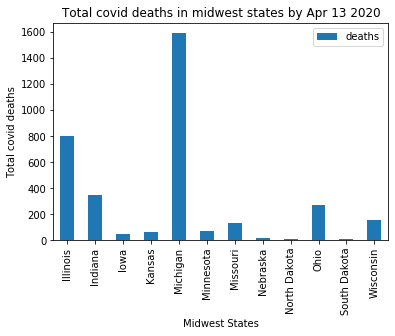

In [39]:
# Bar plot to show total covid death per state
state_mortality_bar_chart = mw_state_mortality_df.plot(kind='bar', title="Total covid deaths in midwest states by Apr 13 2020")
state_mortality_bar_chart.set_xlabel("Midwest States")
state_mortality_bar_chart.set_ylabel("Total covid deaths")
plt.savefig('Total covid deaths in midwest states by Apr 13 2020.png')
plt.show()

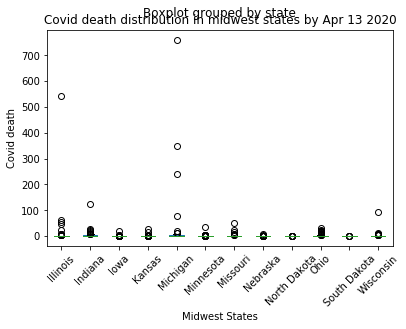

In [40]:
# Box plot to show the distribution of covid deaths in each state
mw_county_covid_death_dist = mw_census_covid_df.boxplot(column=['deaths'], by='state',grid=False, rot=45, fontsize=10)
plt.title("Covid death distribution in midwest states by Apr 13 2020")
plt.xlabel("Midwest States")
plt.ylabel("Covid death")

plt.savefig('Covid death distribution in midwest states by Apr 13 2020.png')
plt.show()

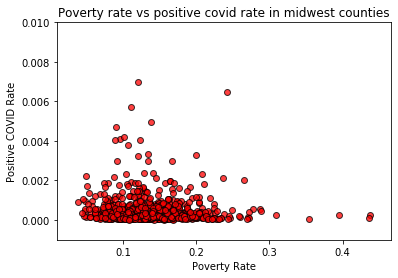

In [41]:
# Scatter plot to show poverty rate and positive covid case in midwest counties
mw_county_census_covid_rate_scatter = plt.scatter(mw_census_covid_df["Poverty Rate"], mw_census_covid_df["Positive Rate"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.ylim(-0.001, 0.010)
plt.title("Poverty rate vs positive covid rate in midwest counties")
plt.xlabel("Poverty Rate")
plt.ylabel("Positive COVID Rate")

plt.savefig('Poverty rate vs positive covid rate in midwest counties.png')

plt.show()

In [42]:
# Calculate the correlation statistic
poverty_covid_rate_correlation = st.pearsonr(mw_census_covid_df["Poverty Rate"], mw_census_covid_df["Positive Rate"])
poverty_covid_rate_correlation

(-0.03644574881946169, 0.29604663111891527)

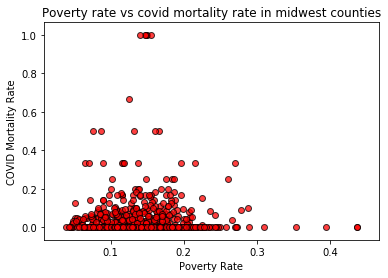

In [43]:
# Scatter plot to show poverty rate and covid mortality rate in midwest counties
mw_county_census_covid_rate_scatter = plt.scatter(mw_census_covid_df["Poverty Rate"], mw_census_covid_df["Mortality Rate"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Poverty rate vs covid mortality rate in midwest counties")
plt.xlabel("Poverty Rate")
plt.ylabel("COVID Mortality Rate")

plt.savefig('Poverty rate vs covid mortality rate in midwest counties.png')

plt.show()


In [44]:
# Calculate the correlation statistic
poverty_mortality_rate_correlation = st.pearsonr(mw_census_covid_df["Poverty Rate"], mw_census_covid_df["Mortality Rate"])
poverty_mortality_rate_correlation

(0.04267085375841176, 0.2211100190376904)

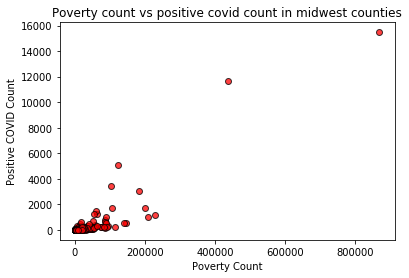

In [45]:
# Scatter plot to show poverty count and positive covid case in midwest counties
mw_county_poverty_covid_case_scatter = plt.scatter(mw_census_covid_df["Poverty Count"], mw_census_covid_df["cases"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Poverty count vs positive covid count in midwest counties")
plt.xlabel("Poverty Count")
plt.ylabel("Positive COVID Count")

plt.savefig('Poverty count vs positive covid count in midwest counties.png')

plt.show()

In [46]:
# Calculate the statistic
poverty_covid_count_correlation = st.pearsonr(mw_census_covid_df["Poverty Count"], mw_census_covid_df["cases"])
poverty_covid_count_correlation

(0.9065437367045699, 3.87569998633986e-310)

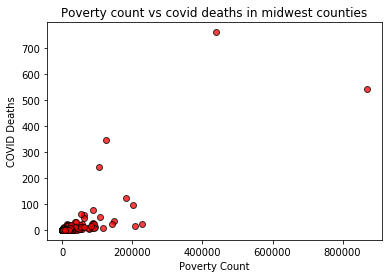

In [47]:
# Scatter plot to show poverty count and covid deaths in midwest counties
mw_county_poverty_covid_case_scatter = plt.scatter(mw_census_covid_df["Poverty Count"], mw_census_covid_df["deaths"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Poverty count vs covid deaths in midwest counties")
plt.xlabel("Poverty Count")
plt.ylabel("COVID Deaths")

plt.savefig('Poverty count vs covid deaths in midwest counties.png')

plt.show()

In [48]:
# Calculate the statistic
poverty_covid_death_correlation = st.pearsonr(mw_census_covid_df["Poverty Count"], mw_census_covid_df["deaths"])
poverty_covid_death_correlation

(0.7949544221822892, 1.349580134178073e-180)

# Summary of the analysis:
1. At state level, Michigan has the highest positive cases and deaths. 
2. There is a moderately strong positive correlation between death rate, positive covid rate and poverty. 
3. Looking at the time overtime, we saw a jump in positive covid case numbers after Apr 3rd 2020, which could be due to the increasing testing. 
4. For the average poverty rate in midwest states at the county level, Missouri has the highest. 
5. By checking the distribution of positive covid cases and death in midwest states at county level, we found Michigan and Illinois have the most extreme outliers. 
6. We found strong positive correlation between posivite covid cases, deaths and poverty count at the county level in midwest, which is consistant with the state level. 